In [1]:
###この章では、吸収端の大きなピーク以外の、"小さいピーク"のみを取り扱う###
###また、post-edge(吸収端よりも右側)のピークのみを取り扱う###

from larch import Interpreter
session = Interpreter()
import larch
from larch import io
from larch import xafs
from larch.io import read_ascii
from larch.xafs import pre_edge
from larch.xafs import mback

import matplotlib.pyplot as plt
import numpy as np

data = io.read_ascii("output.txt", labels="energy mu")
larch.xafs.pre_edge(data, _larch=session)

ピークの数: 34
ピークの位置: [13598.671547, 13676.210132, 13687.930642, 13705.812352, 13760.204905, 13846.651219, 13847.924531, 13848.896429, 13851.678828, 13854.378499, 13857.817507, 13860.301376, 13895.625787, 13919.118619, 13922.691815, 13923.877645, 13926.046547, 13926.775316, 13961.230422, 14009.24129, 14013.201684, 14055.438564, 14098.079844, 14108.699831, 14114.093622, 14129.682951, 14170.731812, 14180.997132, 14201.445628, 14256.985009, 14294.073836, 14310.850241, 14361.054297, 14382.078808]


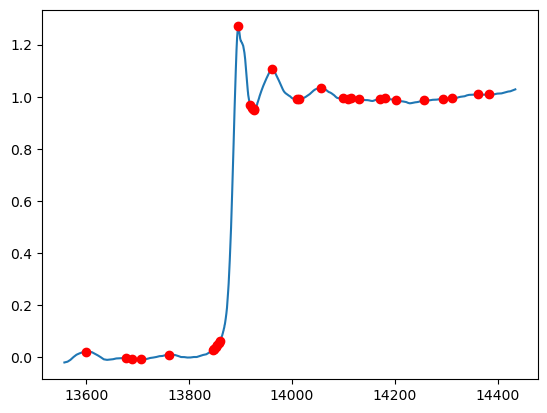

In [3]:
###はじめに、scipy(特別な操作は何もなし)を使ってピークの数を検出する###

import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

# データ点の座標を表すndarray
x = data.energy
y = data.mu

# ピークの検出
peaks, _ = find_peaks(y)

# ピークの数と位置の表示
num_peaks = len(peaks)
peak_positions = [x[i] for i in peaks]
print("ピークの数:", num_peaks)
print("ピークの位置:", peak_positions)

# ピークの位置をグラフにプロット
plt.plot(data.energy, data.mu)
plt.plot(peak_positions, [y[i] for i in peaks], 'ro')
plt.show()

In [4]:
#不要なピークも数多く見受けられる。

ピークの数: 6
ピークの位置: [13895.625787, 13961.230422, 14055.438564, 14114.093622, 14180.997132, 14361.054297]


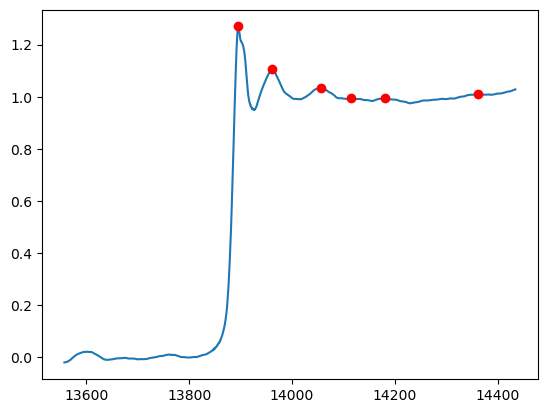

In [5]:
###次に、上に凸である(極大値を持つ)ピークの数を調べる###

import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

# ピークの検出
peaks, _ = find_peaks(y)

# 上に凸のピークのみを抽出
convex_peaks = []
for i in range(1, len(peaks)-1):
    if y[peaks[i]] > y[peaks[i-1]] and y[peaks[i]] > y[peaks[i+1]]:
        convex_peaks.append(peaks[i])

# ピークの数と位置の表示
num_peaks = len(convex_peaks)
peak_positions = [x[i] for i in convex_peaks]
print("ピークの数:", num_peaks)
print("ピークの位置:", peak_positions)

# ピークの位置をグラフにプロット
plt.plot(data.energy, data.mu)
plt.plot(peak_positions, [y[i] for i in convex_peaks], 'ro')
plt.show()

ピークの数: 6
ピークの位置: [13705.812352, 13926.046547, 14013.201684, 14108.699831, 14129.682951, 14256.985009]


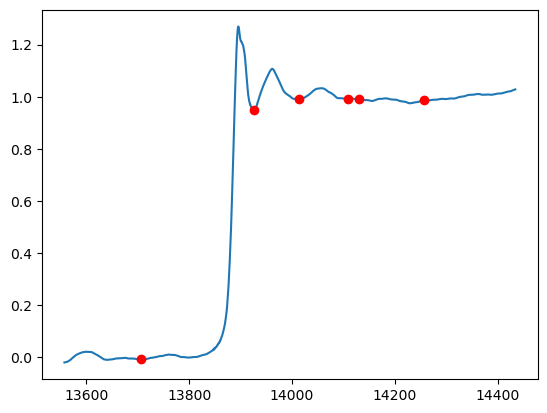

In [6]:
###次に、下に凸である(極小値を持つ)ピークの数を調べる###

import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

# ピークの検出
peaks, _ = find_peaks(y)

# 下に凸のピークのみを抽出
convex_peaks = []
for i in range(1, len(peaks)-1):
    if y[peaks[i]] < y[peaks[i-1]] and y[peaks[i]] < y[peaks[i+1]]:
        convex_peaks.append(peaks[i])

# ピークの数と位置の表示
num_peaks = len(convex_peaks)
peak_positions = [x[i] for i in convex_peaks]
print("ピークの数:", num_peaks)
print("ピークの位置:", peak_positions)

# ピークの位置をグラフにプロット
plt.plot(data.energy, data.mu)
plt.plot(peak_positions, [y[i] for i in convex_peaks], 'ro')
plt.show()

ピークの数: 12
ピークの位置: [13705.812352, 13895.625787, 13926.046547, 13961.230422, 14013.201684, 14055.438564, 14108.699831, 14114.093622, 14129.682951, 14180.997132, 14256.985009, 14361.054297]


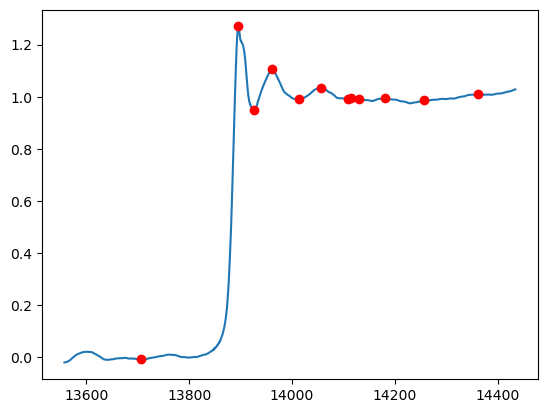

In [7]:
###次に、上に凸・下に凸である(極大値または極小値を持つ)ピークの数を調べる###
###つまり、前の2つを合わせたものである###

import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

# ピークの検出
peaks, _ = find_peaks(y)

# 上に凸・下に凸のピークのみを抽出
convex_peaks = []
for i in range(1, len(peaks)-1):
    if (y[peaks[i]] > y[peaks[i-1]] and y[peaks[i]] > y[peaks[i+1]]) or (y[peaks[i]] < y[peaks[i-1]] and y[peaks[i]] < y[peaks[i+1]]):
        convex_peaks.append(peaks[i])

# ピークの数と位置の表示
num_peaks = len(convex_peaks)
peak_positions = [x[i] for i in convex_peaks]
print("ピークの数:", num_peaks)
print("ピークの位置:", peak_positions)

# ピークの位置をグラフにプロット
plt.plot(data.energy, data.mu)
plt.plot(peak_positions, [y[i] for i in convex_peaks], 'ro')
plt.show()

ピークの数: 8
ピークの位置: [13705.812352, 13895.625787, 13926.046547, 13961.230422, 14013.201684, 14055.438564, 14108.699831, 14361.054297]


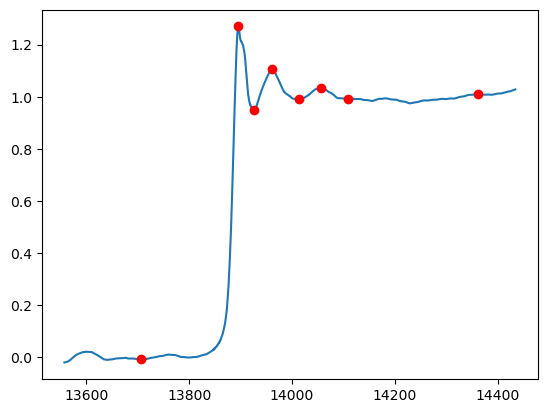

In [8]:
###次に、上に凸・下に凸である(極大値または極小値を持つ)ピークの数を調べる###
###ただし、隣り合うピークの差が0.02以上のもののみ###
###まだ余計なピークも検出されている###

import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

# ピークの検出
peaks, _ = find_peaks(y)

# 上に凸・下に凸のピークのみを抽出
convex_peaks = []
for i in range(1, len(peaks)-1):
    if (y[peaks[i]] > y[peaks[i-1]] and y[peaks[i]] > y[peaks[i+1]]) or (y[peaks[i]] < y[peaks[i-1]] and y[peaks[i]] < y[peaks[i+1]]):
        convex_peaks.append(peaks[i])

# 隣り合うピークのy座標の差が0.02以上となるピークのみを抽出
filtered_peaks = [convex_peaks[0]]  # 最初のピークを追加
for i in range(1, len(convex_peaks)):
    if abs(y[convex_peaks[i]] - y[convex_peaks[i-1]]) >= 0.02:
        filtered_peaks.append(convex_peaks[i])

# ピークの数と位置の表示
num_peaks = len(filtered_peaks)
peak_positions = [x[i] for i in filtered_peaks]
print("ピークの数:", num_peaks)
print("ピークの位置:", peak_positions)

# ピークの位置をグラフにプロット
plt.plot(x, y)
plt.plot(peak_positions, [y[i] for i in filtered_peaks], 'ro')
plt.show()


ピークの数: 5
ピークの位置: [13705.812352, 13895.625787, 13926.046547, 13961.230422, 14013.201684]


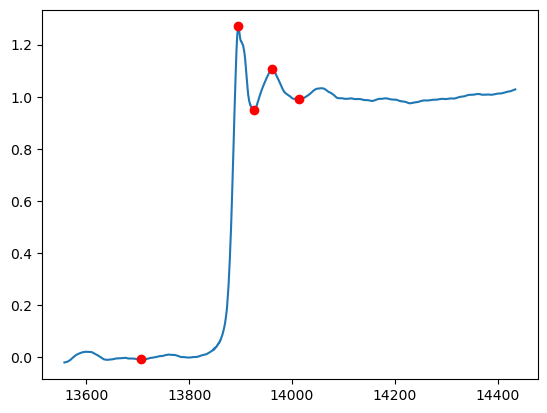

In [9]:
###次に、上に凸・下に凸である(極大値または極小値を持つ)ピークの数を調べる###
###ただし、隣り合うピークの差が0.05以上のもののみ###
###まだ余計なピークも検出されている###

import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

# ピークの検出
peaks, _ = find_peaks(y)

# 上に凸・下に凸のピークのみを抽出
convex_peaks = []
for i in range(1, len(peaks)-1):
    if (y[peaks[i]] > y[peaks[i-1]] and y[peaks[i]] > y[peaks[i+1]]) or (y[peaks[i]] < y[peaks[i-1]] and y[peaks[i]] < y[peaks[i+1]]):
        convex_peaks.append(peaks[i])

# 隣り合うピークのy座標の差が0.02以上となるピークのみを抽出
filtered_peaks = [convex_peaks[0]]  # 最初のピークを追加
for i in range(1, len(convex_peaks)):
    if abs(y[convex_peaks[i]] - y[convex_peaks[i-1]]) >= 0.05:
        filtered_peaks.append(convex_peaks[i])

# ピークの数と位置の表示
num_peaks = len(filtered_peaks)
peak_positions = [x[i] for i in filtered_peaks]
print("ピークの数:", num_peaks)
print("ピークの位置:", peak_positions)

# ピークの位置をグラフにプロット
plt.plot(x, y)
plt.plot(peak_positions, [y[i] for i in filtered_peaks], 'ro')
plt.show()


ピークの数: 3
ピークの位置: [13895.625787, 13961.230422, 14055.438564]


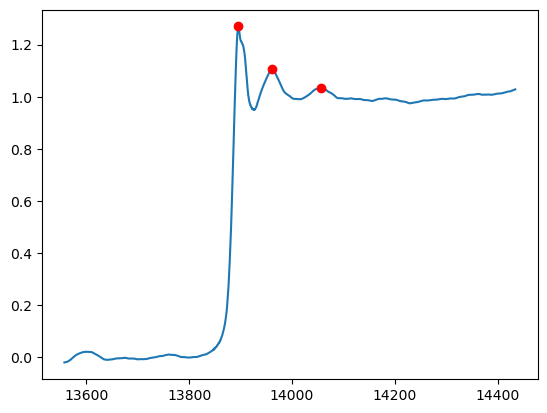

In [10]:
###次に、上に凸だけピークの数を調べる###
###ただし、隣り合うピークの差が0.05以上のもののみ###
###まだ余計なピークも検出されている###
###これだと、極大値ピークの差が0.05という意味で、正しくない###

import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

# ピークの検出
peaks, _ = find_peaks(y)

# 上に凸のピークのみを抽出
convex_peaks = []
for i in range(1, len(peaks)-1):
    if (y[peaks[i]] > y[peaks[i-1]] and y[peaks[i]] > y[peaks[i+1]]):
        convex_peaks.append(peaks[i])

# 隣り合うピークのy座標の差が0.05以上となるピークのみを抽出
filtered_peaks = [convex_peaks[0]]  # 最初のピークを追加
for i in range(1, len(convex_peaks)):
    if abs(y[convex_peaks[i]] - y[convex_peaks[i-1]]) >= 0.05:
        filtered_peaks.append(convex_peaks[i])

# ピークの数と位置の表示
num_peaks = len(filtered_peaks)
peak_positions = [x[i] for i in filtered_peaks]
print("ピークの数:", num_peaks)
print("ピークの位置:", peak_positions)

# ピークの位置をグラフにプロット
plt.plot(x, y)
plt.plot(peak_positions, [y[i] for i in filtered_peaks], 'ro')
plt.show()


ピークの数: 6
ピークの位置: [13705.812352, 13895.625787, 13926.046547, 13961.230422, 14013.201684, 14055.438564]


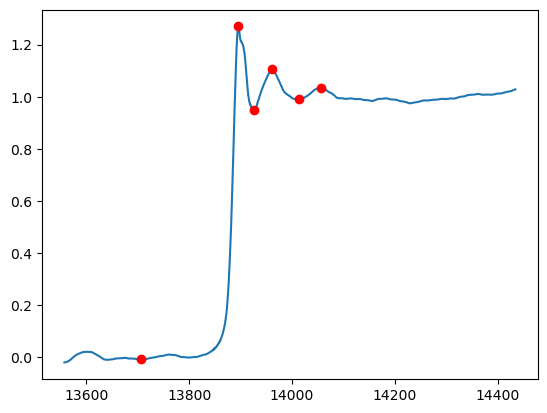

In [11]:
###次に、上に凸・下に凸である(極大値または極小値を持つ)ピークの数を調べる###
###ただし、隣り合うピークの差が0.04以上のもののみ###
###まだ余計なピークも検出されている###

import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

# ピークの検出
peaks, _ = find_peaks(y)

# 上に凸・下に凸のピークのみを抽出
convex_peaks = []
for i in range(1, len(peaks)-1):
    if (y[peaks[i]] > y[peaks[i-1]] and y[peaks[i]] > y[peaks[i+1]]) or (y[peaks[i]] < y[peaks[i-1]] and y[peaks[i]] < y[peaks[i+1]]):
        convex_peaks.append(peaks[i])

# 隣り合うピークのy座標の差が0.04以上となるピークのみを抽出
filtered_peaks = [convex_peaks[0]]  # 最初のピークを追加
for i in range(1, len(convex_peaks)):
    if abs(y[convex_peaks[i]] - y[convex_peaks[i-1]]) >= 0.04:
        filtered_peaks.append(convex_peaks[i])

# ピークの数と位置の表示
num_peaks = len(filtered_peaks)
peak_positions = [x[i] for i in filtered_peaks]
print("ピークの数:", num_peaks)
print("ピークの位置:", peak_positions)

# ピークの位置をグラフにプロット
plt.plot(x, y)
plt.plot(peak_positions, [y[i] for i in filtered_peaks], 'ro')
plt.show()


[190, 318, 361]
ピークの数: 6
ピークの位置: [13895.625787, 13926.046547, 13961.230422, 14013.201684, 14055.438564]
ピークの位置y: [1.2698594576435789, 0.9500586427130093, 1.1073385447830073, 0.9907720542113774, 1.032685698381114]
[-0.31980081493056955, 0.15727990206999798, -0.11656649057162993, 0.04191364416973653]
[0.15727990206999798, 0.04191364416973653]
ピークの真の数： 2


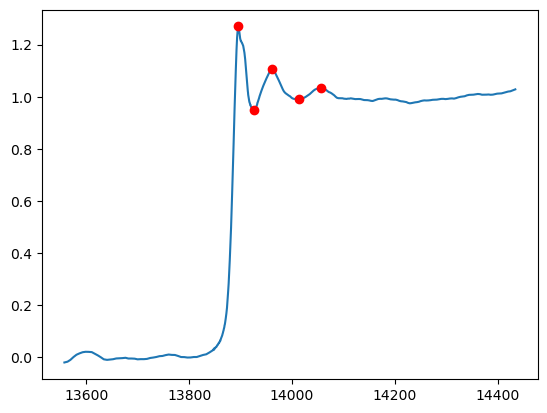

In [13]:
###試行錯誤ver.###

###次に、上に凸・下に凸である(極大値または極小値を持つ)ピークの数を調べる###
###ただし、隣り合うピークの差が0.04以上のもののみ###
###まだ余計なピークも検出されている###

import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

# ピークの検出
peaks, _ = find_peaks(y)

# 上に凸・下に凸のピークのみを抽出
convex_peaks = []
for i in range(1, len(peaks)-1):
    if (y[peaks[i]] > y[peaks[i-1]] and y[peaks[i]] > y[peaks[i+1]]) or (y[peaks[i]] < y[peaks[i-1]] and y[peaks[i]] < y[peaks[i+1]]):
        convex_peaks.append(peaks[i])
        
# 上に凸のピークのみを抽出
convex_peaks_upper = []
for i in range(1, len(peaks)-1):
    if y[peaks[i]] > y[peaks[i-1]] and y[peaks[i]] > y[peaks[i+1]]:
        convex_peaks_upper.append(peaks[i])

# 隣り合うピークのy座標の差が0.04以上となるピークのみを抽出
filtered_peaks = [convex_peaks[0]]  # 最初のピークを追加
for i in range(1, len(convex_peaks)):
    if abs(y[convex_peaks[i]] - y[convex_peaks[i-1]]) >= 0.04:
        filtered_peaks.append(convex_peaks[i])
        
common_peaks = [peak for peak in convex_peaks_upper if peak in filtered_peaks]

print(common_peaks)

# ピークの数と位置の表示
# ただし、μが0.5超のもの(つまり、吸収端よりも右側領域)のみとする
num_peaks = len(filtered_peaks)
peak_positions = [x[i] for i in filtered_peaks if y[i] > 0.5]
peak_positions_y = [y[i] for i in filtered_peaks if y[i] > 0.5]
common_peak_positions = [x[i] for i in common_peaks if y[i] > 0.5]

differences = [peak_positions_y[i+1] - peak_positions_y[i] for i in range(len(peak_positions_y)-1)]
filtered_differences = [diff for diff in differences if 0 < diff < 1]

print("ピークの数:", num_peaks)
print("ピークの位置:", peak_positions)
print("ピークの位置y:", peak_positions_y)
print(differences)
print(filtered_differences)
print("ピークの真の数：", len(filtered_differences))

# ピークの位置をグラフにプロット
plt.plot(x, y)
plt.plot(peak_positions, [y[i] for i in filtered_peaks if y[i] > 0.5], 'ro')
plt.show()


小ピークの位置x: [13895.625787, 13926.046547, 13961.230422, 14013.201684, 14055.438564]
小ピークの位置y: [1.2698594576435789, 0.9500586427130093, 1.1073385447830073, 0.9907720542113774, 1.032685698381114]
小ピークの差異x: [30.420759999999063, 35.183875000000626, 51.971261999999115, 42.23688000000038]
小ピークの差異y: [-0.31980081493056955, 0.15727990206999798, -0.11656649057162993, 0.04191364416973653]
小ピークの幅: [35.183875000000626, 42.23688000000038]
小ピークの高さ: [0.15727990206999798, 0.04191364416973653]
小ピークの数: 2


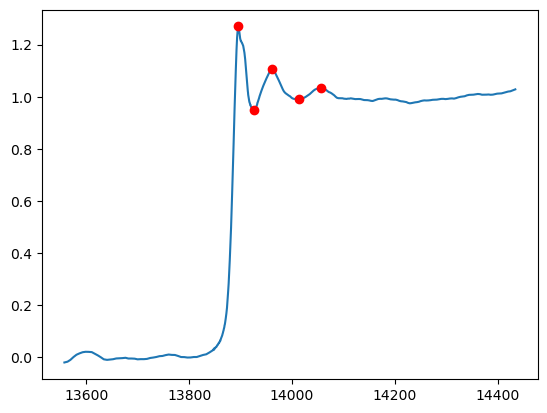

In [14]:
###次に、上に凸・下に凸である(極大値または極小値を持つ)ピークの数を調べる###
###ただし、隣り合うピークの差が0.04以上のもののみ###

import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

# ピークの検出
peaks, _ = find_peaks(y)

# 上に凸・下に凸のピークのみを抽出
convex_peaks = []
for i in range(1, len(peaks)-1):
    if (y[peaks[i]] > y[peaks[i-1]] and y[peaks[i]] > y[peaks[i+1]]) or (y[peaks[i]] < y[peaks[i-1]] and y[peaks[i]] < y[peaks[i+1]]):
        convex_peaks.append(peaks[i])
        
# 上に凸のピークのみを抽出
convex_peaks_upper = []
for i in range(1, len(peaks)-1):
    if y[peaks[i]] > y[peaks[i-1]] and y[peaks[i]] > y[peaks[i+1]]:
        convex_peaks_upper.append(peaks[i])

# 隣り合うピークのy座標の差が0.04以上となるピークのみを抽出
filtered_peaks = [convex_peaks[0]]  # 最初のピークを追加
for i in range(1, len(convex_peaks)):
    if abs(y[convex_peaks[i]] - y[convex_peaks[i-1]]) >= 0.04:
        filtered_peaks.append(convex_peaks[i])

## ピークの数と位置の表示
## ただし、μが0.5超のもの(つまり、吸収端よりも右側領域)のみとする

#ピークの位置(Energy)
peak_positions = [x[i] for i in filtered_peaks if y[i] > 0.5]

#ピークの位置(μt)
peak_positions_y = [y[i] for i in filtered_peaks if y[i] > 0.5]

#ピークの差異(Energy)(減少も含む)
differences = [peak_positions[i+1] - peak_positions[i] for i in range(len(peak_positions)-1)]

#ピークの差異(μt)(減少も含む)
differences_y = [peak_positions_y[i+1] - peak_positions_y[i] for i in range(len(peak_positions_y)-1)]

#ピークの幅
filtered_differences = [differences[i] for i in range(len(differences)) if 0 < differences_y[i] < 1]

#ピークの高さ(=ピークの差異の増加のみ)
filtered_differences_y = [diff for diff in differences_y if 0 < diff < 1]

#ピークの個数は、len(filtered_differences)と表せる。

print("小ピークの位置x:", peak_positions)
print("小ピークの位置y:", peak_positions_y)
print("小ピークの差異x:", differences)
print("小ピークの差異y:", differences_y)
print("小ピークの幅:", filtered_differences)
print("小ピークの高さ:", filtered_differences_y)
print("小ピークの数:", len(filtered_differences_y))

# ピークの位置をグラフにプロット
plt.plot(x, y)
plt.plot(peak_positions, peak_positions_y, 'ro')
plt.show()

# 完成版

小ピークの位置x: [13895.625787, 13926.046547, 13961.230422, 14013.201684, 14055.438564]
小ピークの位置y: [1.2698594576435789, 0.9500586427130093, 1.1073385447830073, 0.9907720542113774, 1.032685698381114]
小ピークの差異x: [30.420759999999063, 35.183875000000626, 51.971261999999115, 42.23688000000038]
小ピークの差異y: [-0.31980081493056955, 0.15727990206999798, -0.11656649057162993, 0.04191364416973653]
小ピークの幅Δx: [35.183875000000626, 42.23688000000038]
小ピークの高さΔy: [0.15727990206999798, 0.04191364416973653]
小ピークの傾き [0.004470226831751624, 0.0009923470713209912]
小ピークの数: 2


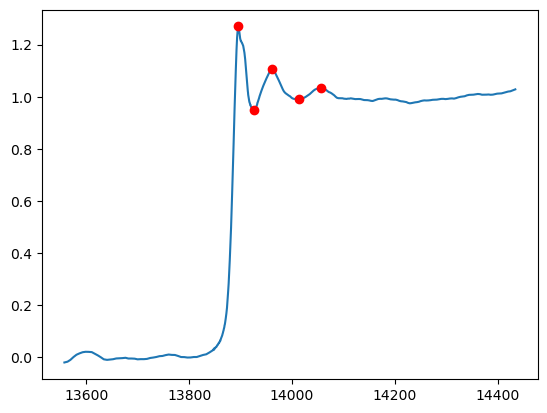

In [17]:
###次に、上に凸・下に凸である(極大値または極小値を持つ)ピークの数を調べる###
###ただし、隣り合うピークの差が0.04以上のもののみ###

import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

# ピークの検出
peaks, _ = find_peaks(y)

# 上に凸・下に凸のピークのみを抽出
convex_peaks = []
for i in range(1, len(peaks)-1):
    if (y[peaks[i]] > y[peaks[i-1]] and y[peaks[i]] > y[peaks[i+1]]) or (y[peaks[i]] < y[peaks[i-1]] and y[peaks[i]] < y[peaks[i+1]]):
        convex_peaks.append(peaks[i])

# 隣り合うピークのy座標の差が0.04以上となるピークのみを抽出
filtered_peaks = [convex_peaks[0]]  # 最初のピークを追加
for i in range(1, len(convex_peaks)):
    if abs(y[convex_peaks[i]] - y[convex_peaks[i-1]]) >= 0.04:
        filtered_peaks.append(convex_peaks[i])

## ピークの数と位置の表示
## ただし、μが0.5超のもの(つまり、吸収端よりも右側領域)のみとする

#ピークの位置(Energy)
peak_positions = [x[i] for i in filtered_peaks if y[i] > 0.5]

#ピークの位置(μt)
peak_positions_y = [y[i] for i in filtered_peaks if y[i] > 0.5]

#ピークの差異(Energy)(減少も含む)
differences = [peak_positions[i+1] - peak_positions[i] for i in range(len(peak_positions)-1)]

#ピークの差異(μt)(減少も含む)
differences_y = [peak_positions_y[i+1] - peak_positions_y[i] for i in range(len(peak_positions_y)-1)]

#ピークの幅(=ピークの差異(μt)が増加しているもののみを抽出 →if文の意味(1以上は吸収端ピークの可能性があるので除外))
filtered_differences = [differences[i] for i in range(len(differences)) if 0 < differences_y[i] < 1]

#ピークの高さ(=ピークの差異(μt)が増加しているもののみを抽出 →if文の意味(1以上は吸収端ピークの可能性があるので除外))
filtered_differences_y = [diff for diff in differences_y if 0 < diff < 1]

#ピークの傾き
small_peak_slope = [filtered_differences_y[i] / filtered_differences[i] for i in range(len(filtered_differences_y))]

#ピークの個数は、len(filtered_differences)と表せる。

print("小ピークの位置x:", peak_positions)
print("小ピークの位置y:", peak_positions_y)
print("小ピークの差異x:", differences)
print("小ピークの差異y:", differences_y)
print("小ピークの幅Δx:", filtered_differences)
print("小ピークの高さΔy:", filtered_differences_y)
print("小ピークの傾き", small_peak_slope)
print("小ピークの数:", len(filtered_differences_y))

# ピークの位置をグラフにプロット
plt.plot(x, y)
plt.plot(peak_positions, peak_positions_y, 'ro')
plt.show()